In [2]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pygrib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import time

def print_time(t0):
    t1 = time.time()
    return t1-t0

In [19]:
# starting and ending viewazimuths
azim_start = 200
azim_end = 250

# starting and ending view elevations
elev_start =50
elev_end = 20

# starting and ending zooms
dist_start = 300
dist_end = 200

# starting and ending center centerlatitude
lat_start = 41
lat_end = 31

# starting and ending center longitude
lon_start = -95
lon_end = -95

# starting and ending layer separation
delev_start = 0
delev_end = 5

# delta center degrees
# latitude window for center
# tradoff with dist
ddeg = 1

# starting and ending flight latitudes
flight_lat_start = 39.7392
flight_lat_end = 25.7617

# starting and ending flight longitudes
flight_lon_start = -104.9903
flight_lon_end = -80.1918

#save files setup
savepath = '../plots/map/movie/flight_test/'
filename = 'test'

# number of frames to plot
num_steps = 100

# flight path height
flight_maxz = 5

# initialize flight list
flight_lat = []
flight_lon = []
flight_z = []
for i in range(num_steps):
    
    t0 = time.time()
    
    flight_lat.append(flight_lat_start-i*((flight_lat_start-flight_lat_end)/num_steps))
    flight_lon.append(flight_lon_start-i*((flight_lon_start-flight_lon_end)/num_steps))
    flight_z.append(((-(1/flight_maxz)*(num_steps/2)**2)**-1)*(i-num_steps/2)**2+(flight_maxz))
    
    map = Basemap(llcrnrlon=-360,llcrnrlat=-90,urcrnrlon=360,urcrnrlat=90,)

    fig = plt.figure(figsize=[10,10],dpi=150)
    ax = Axes3D(fig)

    ax.add_collection3d(map.drawcoastlines(linewidth=0.35))
    ax.add_collection3d(map.drawcountries(linewidth=0.35))

    ax.set_axis_off()
    ax.azim = azim_start-i*((azim_start-azim_end)/num_steps)
    ax.elev = elev_start-i*((elev_start-elev_end)/num_steps)
    ax.dist = dist_start-i*((dist_start-dist_end)/num_steps)
    
    center_lat = lat_start-i*((lat_start-lat_end)/num_steps)
    center_lon = lon_start-i*((lon_start-lon_end)/num_steps)
    
    ax.plot(flight_lon, flight_lat, flight_z, color='r',marker=None,linewidth=3)
    ax.scatter(flight_lon[-1], flight_lat[-1], flight_z[-1],color='r',marker='o',linewidth=10)

    ax.set_xlim3d(center_lon-ddeg,center_lon+ddeg)
    ax.set_ylim3d(center_lat-ddeg,center_lat+ddeg)
    if i < 10:
        fig.savefig(f'{savepath}{filename}0000{i}.png', dpi=fig.dpi)
    elif i >=10 and i < 100:
        fig.savefig(f'{savepath}{filename}000{i}.png', dpi=fig.dpi)
    elif i >=100 and i < 1000:
        fig.savefig(f'{savepath}{filename}00{i}.png', dpi=fig.dpi)
    elif i > 1000:
        fig.savefig(f'{savepath}{filename}0{i}.png', dpi=fig.dpi)
    plt.close()
    print(f'Printed {filename}0000{i}.png in',print_time(t0),'seconds')
    t0 = time.time()

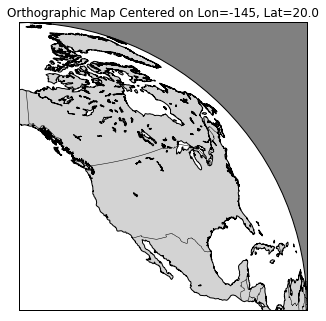

In [2]:
fig = plt.figure()
# global ortho map
lon_0=-145
lat_0=20.
m1 = Basemap(projection='ortho',lon_0=lon_0,lat_0=lat_0,resolution=None)
ax = fig.add_axes([0,0,1,1],facecolor='grey')
# plot just upper right quadrant (corners determined from global map).
m = Basemap(projection='ortho',lon_0=lon_0,lat_0=lat_0,resolution='l',llcrnrx=0.,llcrnry=0.,urcrnrx=m1.urcrnrx/2.,urcrnry=m1.urcrnry/2.)
m.drawcoastlines()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgrey',lake_color='white')
m.drawcountries()
# draw parallels and meridians.
#m.drawparallels(np.arange(-90.,120.,30.))
#m.drawmeridians(np.arange(0.,420.,60.))
plt.title('Orthographic Map Centered on Lon=%s, Lat=%s' % (lon_0,lat_0))

plt.show()